In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
### function we want to sample -- here a 1D gaussian
def lnP(x, args):
    mu = args[0]
    sigma = args[1]
    return -(mu-x)**2/(2*sigma**2) - 0.5*np.log(2*np.pi*sigma**2) 

In [109]:
### M-H MCMC sampler
def MHsampler(lnprob, args, start, steps):
    '''
    TO DO: Add doc string
    '''
    xarr = np.array([]) # to store samples
    yes_steps = 0 # number of accepted steps
    x0 = start # starting point
    for i in xrange(steps):
        # use Uniform distribution as proposal density
        x = np.random.uniform(x0-5,x0+5)
        # acceptance ratio
        alpha = np.exp(lnprob(x,args))/np.exp(lnprob(x0,args))
        # decision time!
        if alpha >= 1:
            xarr = np.append(xarr, x)
            yes_steps += 1
            x0 = x
        else:
            r = np.random.uniform(0,1)
            if alpha >= r:
                xarr = np.append(xarr, x)
                yes_steps +=1
                x0 = x
            else:
                xarr = np.append(xarr, x0)
    return xarr, float(yes_steps)/steps

In [110]:
### time to run the sampler
args = (5,1)
start = 2
steps = 10000
samples, acc_frac = MHsampler(lnP, args, start=start, steps=steps)

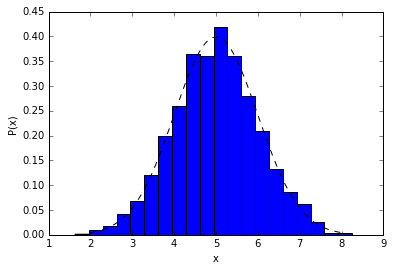

In [111]:
### plotting time!
x = np.linspace(2,8,100)
y = np.exp(lnP(x,(5,1)))
plt.plot(x,y,c='k',ls='--')
plt.hist(samples,bins=20,normed=1)
plt.xlabel(r'x')
plt.ylabel(r'P(x)')
plt.show()

In [112]:
### check acceptance fraction is reasonable
acc_frac

0.3239

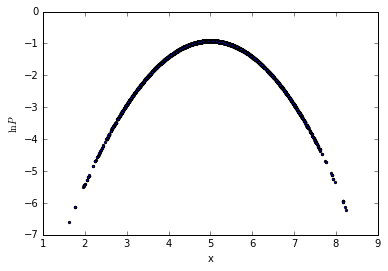

In [116]:
### convergence plots
plt.scatter(samples, lnP(samples,args),marker='.')
plt.xlabel(r'x')
plt.ylabel(r'$\ln P$')
plt.show()

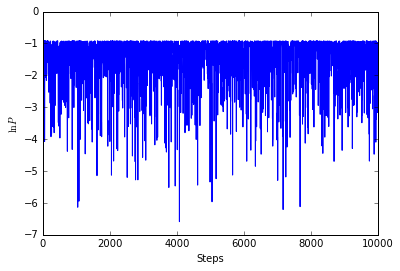

In [117]:
plt.plot(np.arange(steps)+1,lnP(samples,args))
plt.xlabel(r'Steps')
plt.ylabel(r'$\ln P$')
plt.show()